# Overview
Exploratory data analysis of the ifood dataset detailing customer spending habits and campaign response patterns.
The general process of EDA is as follows:
- variable type analysis/transformations
- variable distributional analysis
- anomaly detection (outliers, separation issues, missing data)
- association analysis (correlation, associations)
data source: https://www.kaggle.com/datasets/jackdaoud/marketing-data

In [1]:
# import needed packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read in marketing data
ifood = pd.read_csv('ifood_df.csv')
print(ifood.head())

    Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  marital_Together  \
0              172                88            88  ...                 0   
1                2                 1             6  ...                 0   
2              111                21            42  ...                 1   
3               10                 3             5  ...                 1   
4               46                27            15  ...                 0   

   marital_Widow  education_2n Cycle  education_Basic  e

# Variable Type Analysis

In [3]:
# data conversions
# numeric -> categorical (binary/ordinal indicators)

# convert target variable to binary
ifood['Response'] = ifood['Response'].astype('category')

# list all categorical predictor variables
ifood_cat = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmpOverall',
             'education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD',
             'marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow',
             'Kidhome', 'Teenhome', 'Complain'
            ]

# convert all variables in list to categorical
ifood[ifood_cat] = ifood[ifood_cat].apply(pd.Categorical)

In [4]:
print(ifood.dtypes)

Income                   float64
Kidhome                 category
Teenhome                category
Recency                    int64
MntWines                   int64
MntFruits                  int64
MntMeatProducts            int64
MntFishProducts            int64
MntSweetProducts           int64
MntGoldProds               int64
NumDealsPurchases          int64
NumWebPurchases            int64
NumCatalogPurchases        int64
NumStorePurchases          int64
NumWebVisitsMonth          int64
AcceptedCmp3            category
AcceptedCmp4            category
AcceptedCmp5            category
AcceptedCmp1            category
AcceptedCmp2            category
Complain                category
Z_CostContact              int64
Z_Revenue                  int64
Response                category
Age                        int64
Customer_Days              int64
marital_Divorced        category
marital_Married         category
marital_Single          category
marital_Together        category
marital_Wi

# Variable Distributions

In [5]:
desc = ifood.describe()
print(desc)

              Income      Recency     MntWines    MntFruits  MntMeatProducts  \
count    2205.000000  2205.000000  2205.000000  2205.000000      2205.000000   
mean    51622.094785    49.009070   306.164626    26.403175       165.312018   
std     20713.063826    28.932111   337.493839    39.784484       217.784507   
min      1730.000000     0.000000     0.000000     0.000000         0.000000   
25%     35196.000000    24.000000    24.000000     2.000000        16.000000   
50%     51287.000000    49.000000   178.000000     8.000000        68.000000   
75%     68281.000000    74.000000   507.000000    33.000000       232.000000   
max    113734.000000    99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count      2205.000000       2205.000000   2205.000000        2205.000000   
mean         37.756463         27.128345     44.057143           2.318367   
std          54.824635         41.130468     51.

# Variable Anomolies

In [6]:
# check for missing data
missing_values = ifood.isnull().sum()
missing_columns = missing_values[missing_values > 0]
print(missing_columns)

Series([], dtype: int64)


In [7]:
# check for separation issues
for var in ifood_cat :
    print(pd.crosstab(ifood['Response'], ifood[var]))

AcceptedCmp1     0   1
Response              
0             1809  63
1              254  79
AcceptedCmp2     0   1
Response              
0             1862  10
1              313  20
AcceptedCmp3     0   1
Response              
0             1786  86
1              256  77
AcceptedCmp4     0    1
Response               
0             1770  102
1              271   62
AcceptedCmp5     0   1
Response              
0             1802  70
1              242  91
AcceptedCmpOverall     0    1   2   3   4
Response                                 
0                   1601  222  39   9   1
1                    146  100  42  35  10
education_2n Cycle     0    1
Response                     
0                   1696  176
1                    311   22
education_Basic     0   1
Response                 
0                1820  52
1                 331   2
education_Graduation    0    1
Response                      
0                     911  961
1                     181  152
education_Master    

In [8]:
# outlier detection

# save all numeric variables as a list
ifood_num = desc.columns.tolist()

# loop through all numeric variables to identify outliers with IQR
for var in ifood_num :
    # calculate 25th and 75th percentile
    Q1 = ifood[var].quantile(0.25)
    Q3 = ifood[var].quantile(0.75)
    IQR = Q3 - Q1

    # define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # identify outliers
    outliers = ifood[(ifood[var] < lower_bound) | (ifood[var] > upper_bound)]
    print(f"{var} outliers:")
    print(outliers)

Income outliers:
Empty DataFrame
Columns: [Income, Kidhome, Teenhome, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response, Age, Customer_Days, marital_Divorced, marital_Married, marital_Single, marital_Together, marital_Widow, education_2n Cycle, education_Basic, education_Graduation, education_Master, education_PhD, MntTotal, MntRegularProds, AcceptedCmpOverall]
Index: []

[0 rows x 39 columns]
Recency outliers:
Empty DataFrame
Columns: [Income, Kidhome, Teenhome, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_Cos

# Correlations

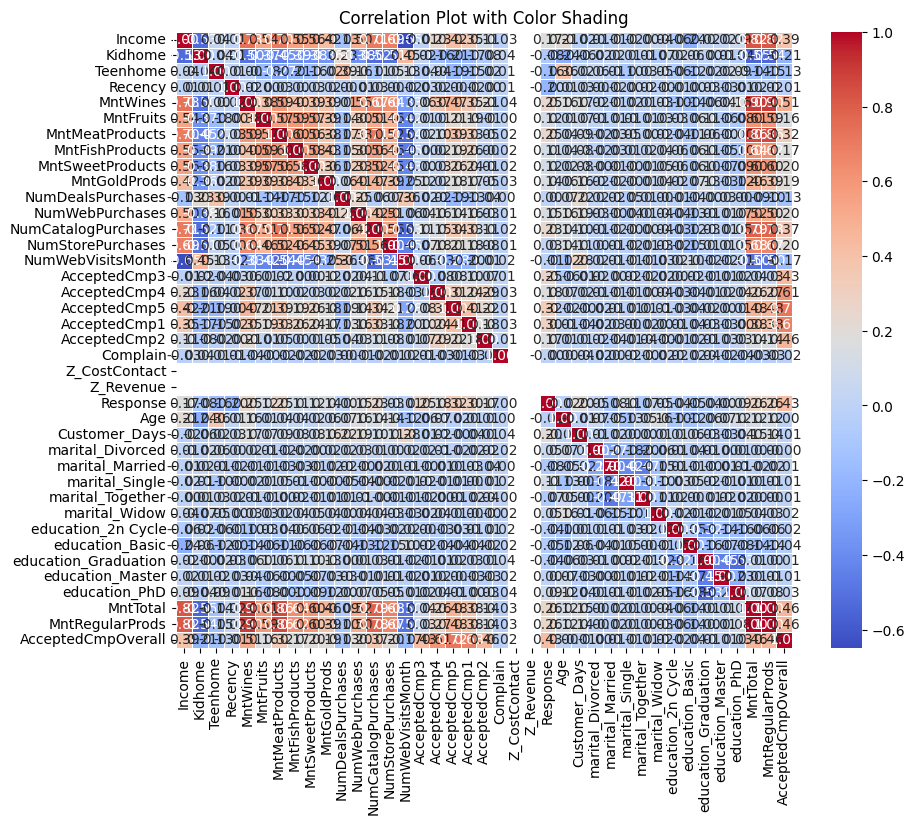

In [9]:
correlation_matrix = ifood.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True,          # Display correlation values
            cmap='coolwarm',     # Color shading (coolwarm, viridis, plasma, etc.)
            fmt=".2f",           # Format for numbers
            linewidths=0.5,      # Lines between cells
            square=True)         # Make cells square

plt.title('Correlation Plot with Color Shading')
plt.show()

In [10]:
# idenfity highly correlated variables (above 0.75 or below -0.75)
pos_threshold = 0.75
neg_threshold = -0.75
high_corr_pairs = correlation_matrix.where(
    ((correlation_matrix >= pos_threshold) | (correlation_matrix <= neg_threshold)) & (correlation_matrix != 1.0)).stack()
print("\nHighly Correlated Pairs:")
print(high_corr_pairs)

# variables to drop: 'Z_CostContact', 'Z_Revenue', 'MntTotal', 'MntRegularProds', 'AcceptedCmpOverall'*


Highly Correlated Pairs:
Income               MntTotal               0.823066
                     MntRegularProds        0.816879
MntWines             MntTotal               0.902310
                     MntRegularProds        0.901848
MntMeatProducts      MntTotal               0.861392
                     MntRegularProds        0.860663
NumCatalogPurchases  MntTotal               0.791187
                     MntRegularProds        0.778742
MntTotal             Income                 0.823066
                     MntWines               0.902310
                     MntMeatProducts        0.861392
                     NumCatalogPurchases    0.791187
                     MntRegularProds        0.996569
MntRegularProds      Income                 0.816879
                     MntWines               0.901848
                     MntMeatProducts        0.860663
                     NumCatalogPurchases    0.778742
                     MntTotal               0.996569
dtype: float64


# Campaign Testing

In [11]:
# use Cochran's Q test for significant differences between customer campaign responses
from statsmodels.stats.contingency_tables import cochrans_q

ifood_campaign = ifood[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']]

# Cochran's Q test
result = cochrans_q(ifood_campaign)
print(result)
# at lest one campaign has a significantly different response rate

df          5
pvalue      4.2306049840149846e-79
statistic   376.08028807682047


In [39]:
# perform a post-hoc pairwise McNemar's test
from itertools import combinations
from statsmodels.stats.contingency_tables import mcnemar
import statsmodels.stats.multitest as smm

# create pairwise comparisons between each campaign
pairs = list(combinations(ifood_campaign.columns, 2))
alpha = 0.05

# perform individual mcnemar tests for each campaign pair
for pair in pairs:
    table = pd.crosstab(ifood_campaign[pair[0]], ifood_campaign[pair[1]])
    result = mcnemar(table, exact=True)
    p_value = result.pvalue

    # apply Bonferroni correction (reduce type I error risk)
    p_value_adj = p_value * len(pairs)
    adjusted_alpha = alpha/len(pairs)

    # print results of each significant comparison
    if p_value_adj < adjusted_alpha :
        print(f"{pair}: adjusted p-value={p_value_adj}")

# campaign 2 is significantly different from all other campaigns (less customer responses)
# the final campaign is significantly different from all 5 other campaigns (more customer responses)
# campaigns 1, 3, 4, and 5 are not signifcantly different from each other in terms of customer responses

('AcceptedCmp1', 'AcceptedCmp2'): adjusted p-value=2.5656210184884974e-21
('AcceptedCmp1', 'Response'): adjusted p-value=3.7261931882421794e-27
('AcceptedCmp2', 'AcceptedCmp3'): adjusted p-value=2.6469704666496385e-24
('AcceptedCmp2', 'AcceptedCmp4'): adjusted p-value=1.1699925508555891e-31
('AcceptedCmp2', 'AcceptedCmp5'): adjusted p-value=6.117130978207308e-28
('AcceptedCmp2', 'Response'): adjusted p-value=5.365317795079052e-78
('AcceptedCmp3', 'Response'): adjusted p-value=1.4350816567133877e-19
('AcceptedCmp4', 'Response'): adjusted p-value=1.2476848574869235e-17
('AcceptedCmp5', 'Response'): adjusted p-value=3.724635148023631e-22


In [28]:
# association analysis
from mlxtend.frequent_patterns import apriori, association_rules

# get the most frequent campaign response pairs 
frequent_pairs = apriori(ifood_campaign, min_support=0.01, use_colnames=True)

# output the association rules
rules = association_rules(frequent_pairs, num_itemsets = 2205, metric="lift", min_threshold=5.0)

# filter the association rules to only include consequents with the response variable
rules_response = rules[rules['consequents'].apply(lambda x: 'Response' in x)]

# output the final rules table (sorted by confidence)
rules_table = rules_response[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(by='confidence', ascending=False)
print(rules_table)

# customers responses to campaigns 1, 4, and 5 are usually associated with responding to the final campaign

                                   antecedents  \
27  (AcceptedCmp1, AcceptedCmp5, AcceptedCmp4)   
16                (AcceptedCmp1, AcceptedCmp5)   
10                (AcceptedCmp1, AcceptedCmp4)   
32                (AcceptedCmp1, AcceptedCmp4)   
33                (AcceptedCmp5, AcceptedCmp4)   
31                (AcceptedCmp1, AcceptedCmp5)   
18                              (AcceptedCmp1)   
19                              (AcceptedCmp5)   
22                              (AcceptedCmp5)   
23                              (AcceptedCmp4)   
12                              (AcceptedCmp1)   
13                              (AcceptedCmp4)   
35                              (AcceptedCmp1)   
36                              (AcceptedCmp5)   
37                              (AcceptedCmp4)   

                               consequents   support  confidence       lift  
27                              (Response)  0.011791    0.838710   5.553618  
16                              (Response) 

c:\Users\marie\anaconda3\envs\AnalyticsFoundations\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
